In [1]:
%config Completer.use_jedi = False

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv


In [3]:
df = pd.read_csv("/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv")

In [4]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

pd.options.display.max_columns
pd.set_option('display.max_columns', None)

In [5]:

df = df.drop(['index'],axis=1)
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [6]:
# Pivot table by city
pivot_cityspends = (df.pivot_table(values='Amount', index='City', 
                                  aggfunc=sum, sort=False)).sort_values(by ='Amount', ascending=False)

display(pivot_cityspends)

,Amount
City,
"Greater Mumbai, India",576751476
"Bengaluru, India",572326739
"Ahmedabad, India",567794310
"Delhi, India",556929212
"Kolkata, India",115466943
"Lucknow, India",115334476
"Chennai, India",114730600
"Hyderabad, India",114493477
"Surat, India",114486151


In [7]:
# Pivot table by city expense type
pivot_city_exp_type = df.pivot_table(values='Amount', index='City', columns = 'Exp Type',
                                  aggfunc=sum, sort=False, margins = True, margins_name='Total')
pivot_city_exp_type

Exp Type,Bills,Entertainment,Food,Fuel,Grocery,Travel,Total
City,,,,,,,
"Delhi, India",140250013.0,88282990.0,120130834.0,115348944.0,92916431.0,NaN,556929212
"Greater Mumbai, India",153565576.0,95596729.0,113454201.0,116234363.0,97900607.0,NaN,576751476
"Bengaluru, India",141499422.0,96061083.0,123803420.0,118066371.0,92896443.0,NaN,572326739
"Ahmedabad, India",141289703.0,97502266.0,117466659.0,116499993.0,95035689.0,NaN,567794310
"Markapur, India",100864.0,339174.0,187847.0,154558.0,291407.0,NaN,1073850
"Mavoor, India",19174.0,47547.0,249308.0,NaN,152738.0,NaN,468767
"Sillod, India",169203.0,386672.0,321371.0,512710.0,168229.0,NaN,1558185
"Nainital, India",80668.0,277726.0,178276.0,664762.0,477951.0,NaN,1679383
"Laharpur, India",251017.0,154106.0,308721.0,238379.0,NaN,NaN,952223


In [8]:
# Pivot table by city expense type
pivot_gender = df.pivot_table(values='Amount', index='City', columns = 'Gender',
                                  aggfunc=sum, sort=False,margins = True, margins_name='Total')
pivot_gender

Gender,F,M,Total
City,,,
"Delhi, India",3.236923e+08,2.332369e+08,556929212
"Greater Mumbai, India",3.376170e+08,2.391344e+08,576751476
"Bengaluru, India",3.311984e+08,2.411283e+08,572326739
"Ahmedabad, India",3.191723e+08,2.486220e+08,567794310
"Markapur, India",8.528170e+05,2.210330e+05,1073850
"Mavoor, India",2.779350e+05,1.908320e+05,468767
"Sillod, India",1.236814e+06,3.213710e+05,1558185
"Nainital, India",1.001535e+06,6.778480e+05,1679383
"Laharpur, India",3.189570e+05,6.332660e+05,952223


In [9]:
pivot_genderexp = df.pivot_table(values='Amount', index='City', columns = ['Exp Type', 'Gender'],
                                  aggfunc=sum, sort=False, margins = True, margins_name='Total')
display(pivot_genderexp)

Exp Type                               Bills              Entertainment  \
Gender                                     F            M             F   
City                                                                      
Delhi, India                      99193521.0   41056492.0    42883294.0   
Greater Mumbai, India            113305859.0   40259717.0    49562420.0   
Bengaluru, India                  96846971.0   44652451.0    48424272.0   
Ahmedabad, India                 100028888.0   41260815.0    47463061.0   
Markapur, India                     100864.0          NaN      305988.0   
Mavoor, India                            NaN      19174.0           NaN   
Sillod, India                       169203.0          NaN      386672.0   
Nainital, India                          NaN      80668.0      277726.0   
Laharpur, India                     251017.0          NaN           NaN   
Shenkottai, India                   130912.0          NaN      294753.0   
Neyveli (TS), India                      NaN      92256.0           NaN   
Kapadvanj, India                         NaN     107531.0       27627.0   
Arambagh, India                          NaN          NaN           NaN   
Thana Bhawan, India                      NaN          NaN       56753.0   
Kancheepuram, India                  87485.0          NaN           NaN   
Sojat, India                             NaN          NaN      287004.0   
Karjat, India                            NaN          NaN      377101.0   
Mohali, India                       207011.0          NaN           NaN   
Narayanpet, India                     6917.0     160415.0      312358.0   
Bhavnagar, India                         NaN          NaN      354378.0   
Viluppuram, India                   173810.0          NaN           NaN   
Jamalpur, India                     239189.0     250028.0           NaN   
Udaipurwati, India                  157884.0     363966.0           NaN   
Palanpur, India                     168379.0     150434.0           NaN   
Muzaffarpur, India                  218014.0          NaN           NaN   
Taranagar, India                    185565.0     339024.0       61470.0   
Ambikapur, India                    276978.0          NaN      165574.0   
Mundi, India                          2203.0      28754.0      221085.0   
Padrauna, India                          NaN     213026.0           NaN   
Vijayapura, India                   441104.0     162677.0      389904.0   
Vrindavan, India                    202527.0     180382.0           NaN   
Byasanagar, India                   281085.0          NaN      168838.0   
Mudhol, India                        15777.0     185835.0      286133.0   
Sohna, India                        233499.0          NaN       28616.0   
Pune, India                        9177240.0    7969130.0     9247033.0   
Lakheri, India                      163010.0          NaN       48402.0   
Jehanabad, India                    159676.0          NaN           NaN   
Shegaon, India                      156491.0     247702.0      238339.0   
Shikarpur Bulandshahr, India             NaN     125798.0       49811.0   
Dalli-Rajhara, India                     NaN     563366.0      101329.0   
Mapusa, India                            NaN          NaN           NaN   
Uthamapalayam, India                     NaN          NaN        4030.0   
Nasirabad, India                    185880.0      92113.0      384921.0   
Kapurthala, India                        NaN          NaN      191272.0   
Anand, India                             NaN     172489.0           NaN   
Arwal, India                             NaN      81451.0           NaN   
Nanded-Waghala, India                    NaN          NaN           NaN   
Nilambur, India                          NaN     101951.0      103770.0   
Anjar, India                             NaN          NaN           NaN   
Hubli-Dharwad, India                 40803.0          NaN      284450.0   
Jind, India              

In [10]:
pivot_gendercard = df.pivot_table(values='Amount', index='City', columns = ['Card Type', 'Gender'],
                                  aggfunc=sum, sort=False, margins = True, margins_name='Total')
display(pivot_gendercard)

Card Type                               Gold                  Platinum  \
Gender                                     F            M            F   
City                                                                     
Delhi, India                      75221275.0   61043433.0   71240281.0   
Greater Mumbai, India             77201826.0   60781166.0   80135260.0   
Bengaluru, India                  75301626.0   59569935.0   75157028.0   
Ahmedabad, India                  71701513.0   60842150.0   81447629.0   
Markapur, India                          NaN     221033.0     291407.0   
Mavoor, India                        27874.0      19174.0     135496.0   
Sillod, India                            NaN          NaN     453632.0   
Nainital, India                     249113.0     186081.0     456002.0   
Laharpur, India                          NaN          NaN          NaN   
Shenkottai, India                   104701.0     177297.0          NaN   
Neyveli (TS), India                      NaN      88964.0     286979.0   
Kapadvanj, India                         NaN          NaN     139798.0   
Arambagh, India                          NaN     104299.0          NaN   
Thana Bhawan, India                 152271.0          NaN     151565.0   
Kancheepuram, India                      NaN     322306.0          NaN   
Sojat, India                          7031.0     354827.0          NaN   
Karjat, India                            NaN          NaN          NaN   
Mohali, India                        54119.0      74154.0     207011.0   
Narayanpet, India                        NaN      34044.0          NaN   
Bhavnagar, India                    157114.0          NaN          NaN   
Viluppuram, India                        NaN          NaN     333078.0   
Jamalpur, India                          NaN     126438.0          NaN   
Udaipurwati, India                  141946.0     291222.0      66080.0   
Palanpur, India                     168379.0          NaN     383137.0   
Muzaffarpur, India                       NaN     100546.0          NaN   
Taranagar, India                    275458.0     156251.0      61470.0   
Ambikapur, India                    630318.0          NaN          NaN   
Mundi, India                             NaN          NaN          NaN   
Padrauna, India                     556528.0          NaN     336278.0   
Vijayapura, India                   518249.0     162677.0     265596.0   
Vrindavan, India                    512969.0          NaN          NaN   
Byasanagar, India                   375949.0     123593.0      31453.0   
Mudhol, India                            NaN     283229.0          NaN   
Sohna, India                        305183.0          NaN     341047.0   
Pune, India                       14727444.0   12045431.0   13137625.0   
Lakheri, India                           NaN          NaN     183935.0   
Jehanabad, India                     99228.0          NaN      68604.0   
Shegaon, India                      238339.0          NaN          NaN   
Shikarpur Bulandshahr, India         49811.0          NaN      82091.0   
Dalli-Rajhara, India                     NaN          NaN          NaN   
Mapusa, India                        98221.0          NaN          NaN   
Uthamapalayam, India                 58188.0          NaN          NaN   
Nasirabad, India                    111411.0      92113.0     371344.0   
Kapurthala, India                   191272.0          NaN     530719.0   
Anand, India                        179683.0     172489.0          NaN   
Arwal, India                             NaN      94554.0     377718.0   
Nanded-Waghala, India               245005.0     215908.0          NaN   
Nilambur, India                     103770.0      78916.0          NaN   
Anjar, India                             NaN          NaN     207628.0   
Hubli-Dharwad, India                447451.0     226214.0     318306.0   
Jind, India                         273191.0     553876.0     406642.0   
Kora

In [11]:
pivot_gender_count = df.pivot_table(index='City', columns='Gender', values='Amount', aggfunc='count', margins = True, margins_name='Total', fill_value=0).sort_values(by ='Total', ascending=False)

# Display the pivot table
display(pivot_gender_count)

Gender,F,M,Total
City,,,
Total,13680,12372,26052
"Bengaluru, India",1960,1592,3552
"Greater Mumbai, India",1922,1571,3493
"Ahmedabad, India",1876,1615,3491
"Delhi, India",1923,1559,3482
"Hyderabad, India",389,395,784
"Chennai, India",374,400,774
"Kolkata, India",372,401,773
"Kanpur, India",392,372,764


In [12]:
pivot_expgender_count = df.pivot_table(index='Exp Type', columns='Gender', values='Amount', aggfunc='count', margins = True, margins_name='Total', fill_value=0).sort_values(by ='F', ascending=False)

# Display the pivot table
display(pivot_expgender_count)

Gender,F,M,Total
Exp Type,,,
Total,13680,12372,26052
Food,3012,2451,5463
Bills,2860,2218,5078
Fuel,2617,2640,5257
Grocery,2428,2326,4754
Entertainment,2384,2378,4762
Travel,379,359,738


In [13]:

df['year'] = pd.DatetimeIndex(df['Date']).year

# Pivot table showing expense count by year and gender
pivot_yearspending = df.pivot_table(index='year', values='Amount', aggfunc=['count','sum'], margins=True, margins_name='Total', fill_value=0)

# Display the pivot table
display(pivot_yearspending)

,count,sum
,Amount,Amount
year,,
2013,3927,613643884
2014,15791,2454714033
2015,6334,1006475456
Total,26052,4074833373


In [14]:
df['month'] = pd.DatetimeIndex(df['Date']).month

# Pivot table showing expense count by year and gender
pivot_monthspending = (df[df['Exp Type'] == 'Travel'].pivot_table(index=['year','month'], values='Amount', aggfunc=['count','sum'],
                                      fill_value=0))

# Display the pivot table
display(pivot_monthspending)

count      sum
           Amount   Amount
year month                
2013 10        31  3832883
     11        32  5652840
     12        43  5867883
2014 1         31  4557965
     2         37  4665816
     3         37  5051459
     4         37  6261113
     5         47  6906496
     6         44  6235434
     7         29  4483812
     8         32  3811831
     9         22  3272659
     10        37  5837558
     11        52  7929200
     12        46  6519505
2015 1         28  4533120
     2         40  5743725
     3         42  5829348
     4         38  6627294
     5         33  5635670

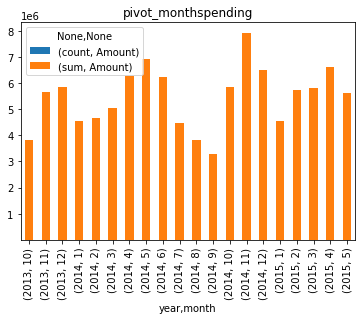

In [15]:
import matplotlib.pyplot as plt

# Create a stacked bar chart
pivot_monthspending.plot(kind='bar', stacked=True)

# Add a title
plt.title('pivot_monthspending')

# Show the plot
plt.show()